# 监督学习
监督学习是最常用也是最成功的的机器学习类型之一。
每当想要根据给定的输入预测某个结果，并且还有输入/输出对的示例时，都应该使用监督学习。
这些输入/输出对构成了训练集，我们利用它来构建机器学习模型。
我们的目标是对从未见过的新数据做出准确预测。
监督学习停车需要人力来构建训练集，但之后的任务本来非常费力甚至无法完成，现在却可以自动完成，通常速度也很快。

## 分类与回归
监督机器学习问题主要有两种，分别叫作**分类（classification）**与**回归（regression）**。
分类问题的目标是预测**类别标签（class label）**，这些标签来自预定义的可选列表。
分类问题又是可分为**二分类（binary classification）**和**多分类（multiclass classification）**。你可以将二分类看作是尝试回答一道是/否问题。将电子邮件分为垃圾邮件和非垃圾邮件就是二分类问题的实例。
在二分类问题中，我们通常将其中一个类别称为**正类（positive class）**，另一个类别称为**反类（negative class）**。这里的“正”并不代表号的方面或正数，而是代表研究对象。因此在寻找垃圾有时，“正”可能指的是垃圾邮件这一类别。将两个类别中的哪一个座位“正类”，往往是主观判断，与具体的领域有关。  
回归任务的目标是预测一个连续值，编程术语叫作**浮点数（floating-point number）**，数学术语叫作**实数（real number）**。在预测收入时，预测值是一个金额（amount）,可以在给定范围内任意取值。  
区分分类任务与回归任务有一个简单方法，就是问一个问题：输出是否具有某种连续性。如果在可能的结果之间具有连续性，那么它就是一个回归问题，否则就是一个分类问题。

## 泛化、过拟合与欠拟合
如果一个模型能够对没见过的数据做出准确预测，我们就说它能够从训练集**泛化（generalize）**到测试集。我们需要构建一个泛化精度尽可能高的模型。 如果在拟合模型时过分关注训练集的细节（记住训练集的特性），得到了一个在训练集上表现很好，但不能泛化到新数据上的模型，那么就是所谓的**过拟合（overfitting）**,与之相反，如果你的模型过于简单——比如说，“有房子的人都买船”——那么你可能没法抓住时机的全部内容以及数据中的变化，你的模型甚至在训练集上的表现就很差，这种选择过于简单的模型被称为**欠拟合（underfitting）** 。  
我们的模型越复杂，在训练集上的预测结果就越好。但是，如果我们的模型过于复杂，我们开始过多关注训练集中每个单独的数据点，模型就不能很好地泛化到新数据上。二者之间存在一个最佳位置，可以得到最好的泛化性能。


## 一些样本数据集
我们模拟一个二分类数据集，它有两个特征，我们将可视化该模拟数据。

In [1]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:(26, 2)


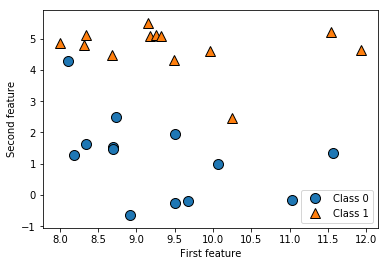

In [2]:
# 生成数据集
X,y=mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

从X.shape可以看出，这个数据集包含26个数据点和2个特征。  

下面我们用模拟的wave数据集来说明回归算法。wave数据集只有一个输入特征和一个连续目标标量（或响应），后者是模型想要预测的对象。下面绘制的图像中单一特征位于x轴，回归目标（输出）位于y轴。

Text(0, 0.5, 'Target')

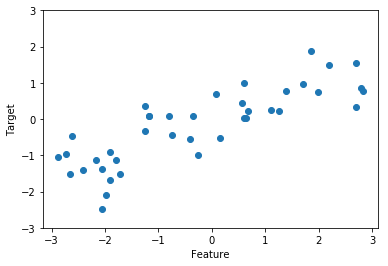

In [3]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

## 分类任务：肿瘤预测
威斯康星州乳腺癌数据集（简称cancer）,里面记录了乳腺癌肿瘤的临床测量数据。每个肿瘤都被标记为“良性（benign,表示无害肿瘤）”或“恶性”（malignant,表示癌性肿瘤），该任务是基于人体组织的测量数据来学习预测肿瘤是否为恶性。

In [4]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Shape of caner data:{}".format(cancer.data.shape))

Shape of caner data:(569, 30)


这个数据集共包含569个数据点，每个数据点有30个二者：

In [6]:
print("Sample counts per class:\n{}".format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


为了得到每个特征的语义说明，我们可以看一下feature_names属性：

In [7]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 回归任务：波士顿房价预测
波士顿房价数据集包含犯罪率、是否邻近查尔斯河、公路可达性等信息，来预测20世纪70年代波士顿地区房屋价格的中位数。这个数据集包含506个数据点和13个特征。

In [8]:
from sklearn.datasets import load_boston
boston=load_boston()
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


在该任务中，我们需要扩展这个数据集，输入特征不仅包含这13个测量结果，还包括这些特征之间的乘积（也叫交互项）。换句话说，我们不仅将犯罪率和公路可达性作为特征，还将犯罪率和公路可达性的乘积做诶特征。像这样包含导出特征的方法叫作**特征工程（feature engineering）**。这个导出的数据集可以用load_extended_boston函数来加载。

## k近邻
k-NN算法可以说是最简单的机器学习算法。构建模型只需要保存训练集即可。想要对新数据点坐车预测，算法会在训练数据集中找到最近的数据点，也就是它的“最近邻”。

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


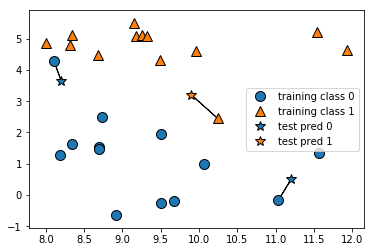

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

上面的代码使用forge数据集，并设置neighbors=1进行预测，这里我们添加了3个新数据点（用五角星表示）。对于每个新数据点，我们标记了训练集中与它最近的点。单一最近邻算法的预测结果就是那个点的标签（对应五角星的颜色）。
除了仅考虑最近邻，我们还可以考虑任意个（k个）邻居。这也是k近邻算法名字的来历。在考虑多余一个邻居的情况时，我们用“投票法”（voting）来指定标签。也就是说，对于每个测试点，我们数一数多少个邻居属于类别0，多少个邻居属于类别1。然后将出现次数更多的类别（也就是k个邻居中占多数的类别）作为预测结果。
下面的例子中用到了3个近邻：

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


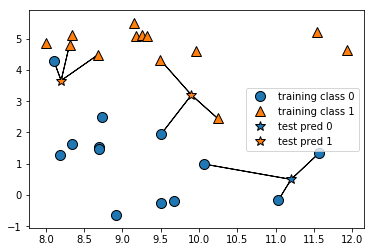

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## k近邻应用示例

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

调用predict方法来对测试数据进行预测。对于测试集中的每个数据点，都要计算它在训练集的最近邻，然后找出其中出现次数最多的类别。

In [12]:
print("Test set prediction:{}".format(clf.predict(X_test)))

Test set prediction:[1 0 1 0 1 0 0]


为了评估模型的泛化能力好坏，我们可以对测试数据和测试标签调用score方法：

In [13]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy:0.86


可以看到，我们的模型精度约为86%，也就是说，在测试数据集中，模型对其中86%的样本预测的类别都是正确的。

### 分析KNeighborsClassifier
对于二维数据集，我们还可以在xy平面上画出所有可能的测试点的预测结果。我们根据平面中每个点所属的类别对平面进行着色。这样可以查看**决策边界（decision boundary）**,即算法对类别0和类别1的分界线。
下面代码分别将1个、3个和9个邻居三种情况的决策边界可视化：

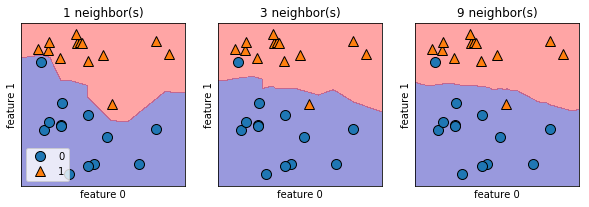

In [14]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

从左图可以看出，使用单一邻居绘制的决策边界紧跟着训练数据。随着邻居个数越来越多，决策边界也越来越平滑。更平滑的边界对应更简单的模型。换句话说，使用更少的邻居对应更高的模型复杂度，而使用更多的邻居对应更低的模型复杂度。假如考虑极端情况，即邻居个数等于训练集中所有数据点的个数，那么每个测试点的邻居都完全相同（即所有训练点），所有预测结果也完全相同（即训练集中出现次数最多的类别）

## 模型复杂度与泛化能力之间的关系
我们使用乳腺癌数据集研究模型复杂度与泛化能力之间的关系。先将数据集分成训练集和测试集，然后利用不同的邻居个数对训练集和测试集的性能进行评估。

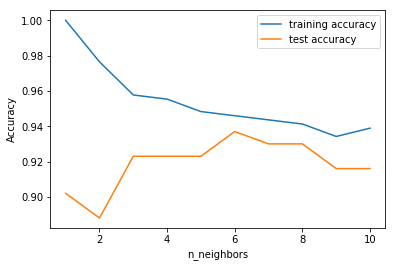

In [15]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]
# n_neighbors取值从1到10
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(X_train,y_train))
    # 记录泛化能力精度
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

上述图像的x轴是n_neighbors,y轴是训练集精度和测试集精度。虽然现实世界的图形很少有非常平滑的，但我们仍然可以看出过拟合和欠拟合的一些特征。仅考虑单一近邻时，训练集上的预测结果十分完美。但随着邻居个数的增多，模型变的简单，训练集精度也随之下降。单一邻居时的测试集精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。与之相反，当考虑10个邻居时，模型又过于简单，性能甚至变得更差。最近性能在中间的某处，邻居个数大约为6。不过最好记住这张图的坐标轴刻度。最差的性能约为88%的精度，这个结果仍然可以接受。

## k近邻回归
k近邻算法还可以用于回归。我们还是先从单一近邻开始，这次试用wave数据集。我们添加了3个测试数据点，在x轴上用绿色五角星表示。利用单一邻居的预测结果就是最近邻的目标。

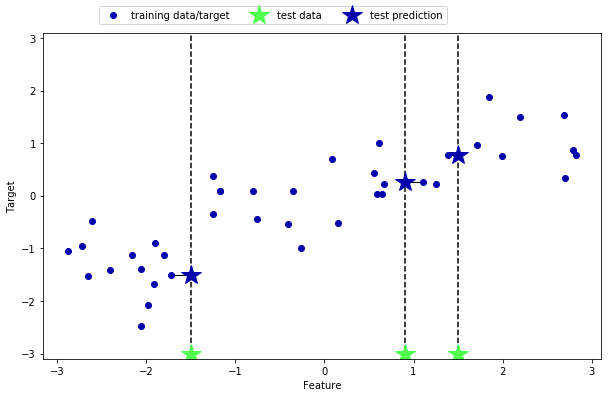

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

同样，也可以用多个近邻进行回归。在使用多个近邻时，预测结果为这些邻居的平均值：

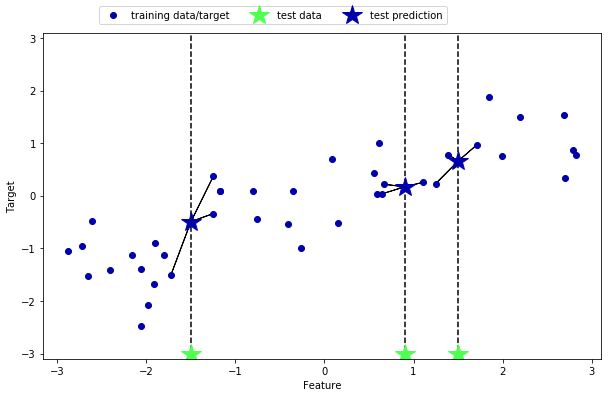

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

用于回归的k近邻算法在scikit-learn的KNeighborsRegressor类中实现。其用法与KNeighborsClassifier类似：

In [18]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

# 将wave数据集分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# 模型实例化，并将邻居个数设为3
reg=KNeighborsRegressor(n_neighbors=3)

# 利用训练数据和训练目标值来拟合模型
reg.fit(X_train,y_train)

#预测
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


我们还可以用score方法来评估模型，对于回归问题，这一方法返回的是R2分数。R2分数也叫作决定系数，是回归模型预测的优度度量，位于0到1之间。R2等于1对应完美预测，R2等于0对应常数模型，即总是预测训练集响应（y_train）的平均值。

In [19]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

Test set R^2:0.83


这里的分数是0.83，表示模型的拟合相对较好。

# 分析KNeighborsRegressor
先创建一个由许多点组成的测试数据：

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "test". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


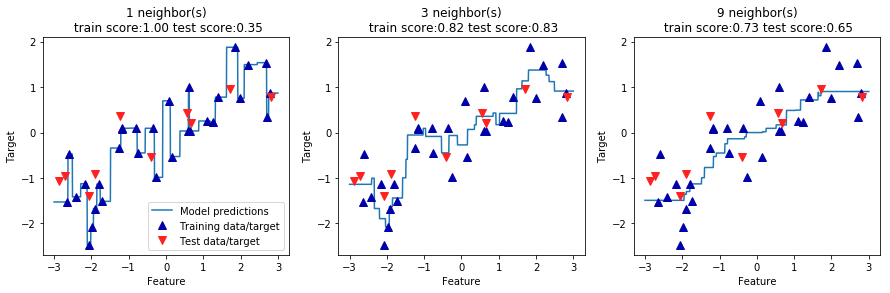

In [27]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
# 创建1000个数据点，在-3和3之间均匀分布
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    # 利用1个、3个或9个邻居分别进行预测
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="test")

从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响。预测结果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好。